## IMHOTEP: SSS Timeseries, ensemble mean, and std 
Notebook to:
1. Load data from an ensemble experiment over a selected region and at a selected point
2. Compute its ensemble mean, std, spatial avera  
3. Plot timeseries of each member of the experiment at the selective point 
4. Plot timeseries of SSS ensemble mean and spread of the experiment at the selective point
5. Plot timeseries of SSS for each member, ensemble mean and spread of the experiment at the selective point
6. Comparison of ensemble mean and std of SSS timeseries from ES and EGAI members 
7. Check the sum of variances at a selected point (forced, intrinsic and total variability)


#### Import modules

In [1]:
# standard libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature

import cmocean

import pkg_resources



# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li
from libimhotep import pltscripts as pltGLO

plt.rcParams.update({'hatch.color': '#086A87'})

# for jupyter notebook display
%matplotlib inline

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
Name: libimhotep.pltscripts
Package: libimhotep
This is a collection of  basic scripts to plot the different GLOBAL plots with my favourite settings.


### **1.  Load data from an ensemble experiment over a selected region and at a selected point**

#### Parameters of the experiment

In [2]:
# ES: this is experiment ES (ensemble simulation) of which we will load all the 10 members
nexp = "ES"

prefix = "eORCA025.L75-IMHOTEP"



# frequency of the input files
fo="1y"

# name of the variable
varnasss = 'sosaline'

# file type
fileType = "gridTsurf"

# period over which to read
y1='1980'
y2='2018'

# ensemble size
NE=10

# input directory on work for grid info
#diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'

# plot directory !!!! CREATE THIS DIRECTORY FIRST ON JEAN ZAY IF DOESNT EXIST YET
diro="/gpfswork/rech/cli/regi915/PLT/2023-05/"+fo+"/"

# data output directory   !!!! CREATE THIS DIRECTORY FIRST ON JEAN ZAY IF DOESNT EXIST YET
dirdat="/gpfswork/rech/cli/regi915/DAT/"



#### Load global data and choose a member at a selected point 

In [3]:
#load global data
data = li.Floadmultimb(NE,nexp,prefix,varnasss,fo,fileType,y1,y2,xselect=[0,1442],yselect=[0,1207],verbose=False)

# Here we select only one member at a selected time (year)
data2plot = data.isel(e=0,time_counter=20).compute()

data2plot

<xarray.DataArray 'sosaline' (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2000-07-02
Dimensions without coordinates: y, x
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           365

#### Load data over a selected region with its latitude and longitude values

In [4]:
# latitude and longitude values you want to select the region over
lonselect=[-60,-30]
latselect=[-10,10]

#======================(OPTIONAL)======================================================
# Find x and y (xselect, yselect) indices you want to select the region over.
for p in range(2):
    # Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
    [i,j] = li.Ffindij(dirigrid, lonselect[p], latselect[p])
    if p==0:
        xi=i
        yi=j
    else:
        xj=i
        yj=j
        
xselect =[xi,xj]
yselect =[yi,yj]

    
# The function 'Floadmultimb' load data from NE ensemble members on the selected subregion
#regdata = li.Floadmultimb(NE,nexp,prefix,varnasss,fo,fileType,y1,y2,xselect=xselect,yselect=yselect,verbose=False)

# quick plot as a check 
#regdata.isel(e=0,time_counter=20).plot()
#=======================================================================================

* (Optional) Check your lat and lon value

In [5]:
# Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
[i,j] = li.Ffindij(dirigrid, -50, 0)

# Load of lat and lon DataArray
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon'] 

# Check the chosen longitude
longitudecheck = lon.isel(x=i,y=j)
print(longitudecheck)

# Check the chosen latitude
latitudecheck = lat.isel(x=i,y=j)
print(latitudecheck)

<xarray.DataArray 'nav_lon' ()>
array(-50., dtype=float32)
<xarray.DataArray 'nav_lat' ()>
array(0., dtype=float32)


#### Plot as a check of the selected region 

* Few data needed to plot as function of lat and lon 

In [6]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [7]:
# user's parameters:
# levels over which to plot the ocean variable [min, max, increment values]
lev = [21, 39, 0.5]
    
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'

# first define some  default color parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TM')
pltcolparam['levbounds']= lev
cbincr=pltcolparam['cbincr']  
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
    
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=5
pltgridparam['incrgridlon']=5
print('- pltgridparam')
print(pltgridparam)

# set default color parameters before plotting
pltcolparam = li.Fpltsetcolorsdefaults('TM')
if (lev=='def'):
    pass
else:
    pltcolparam['levbounds']= lev
if (cbincr=='def'):
    pass
else:
    pltcolparam['cbincr']= cbincr

- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 5, 'incrgridlat': 5, 'sath': 35785831, 'minlat': 10, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-60, -30, -10, 10]}


* Prepare data to plot by masking land grid cells

In [8]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


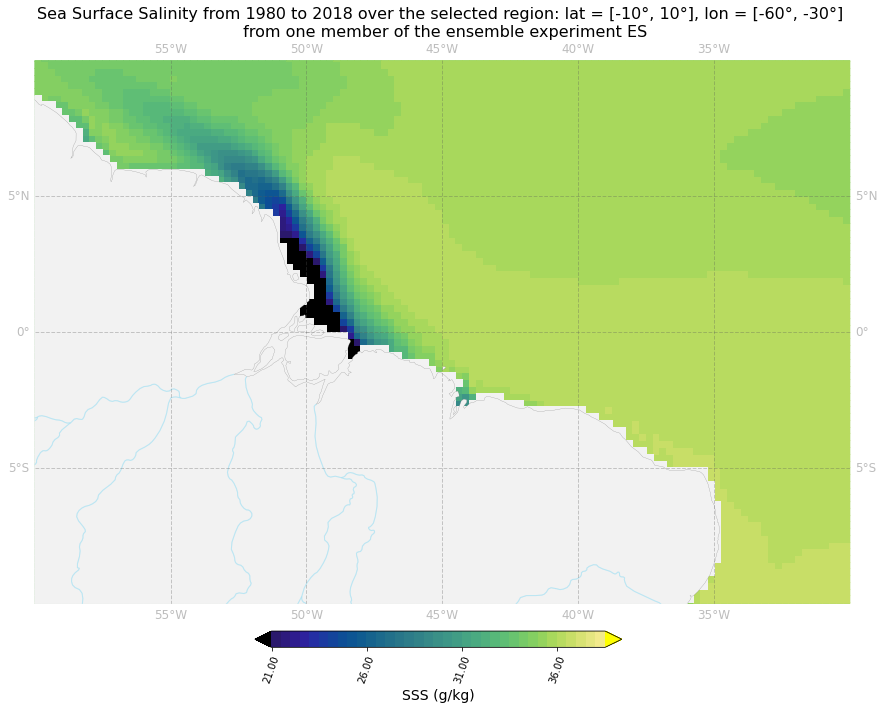

In [9]:

#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='SSS (g/kg)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Sea Surface Salinity from 1980 to 2018 over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°] \n from one member of the ensemble experiment '+nexp,fontsize=16)


plt.show()

#### Choose a specific point in this region with its latitude and longitude values 

In [36]:
# Latitude and longitude values of your point
lonval=-49.5
latval=0.5


# Finds (i,j) = (x,y) coordinates nearest to latitude and longitude values
# MANDATORY TO COMPUTE MEAN AND STD
[i,j] = li.Ffindij(dirigrid, lonval, latval)

#### Plot to check the location 

In [34]:
# user's parameters:
# levels over which to plot the ocean variable [min, max, increment values]
lev = [21, 39, 0.5]
    
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'

# first define some  default color parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TM')
pltcolparam['levbounds']= lev
cbincr=pltcolparam['cbincr']  
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
    
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=5
pltgridparam['incrgridlon']=5
print('- pltgridparam')
print(pltgridparam)

# set default color parameters before plotting
pltcolparam = li.Fpltsetcolorsdefaults('TM')
if (lev=='def'):
    pass
else:
    pltcolparam['levbounds']= lev
if (cbincr=='def'):
    pass
else:
    pltcolparam['cbincr']= cbincr

- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 5, 'incrgridlat': 5, 'sath': 35785831, 'minlat': 10, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-60, -30, -10, 10]}


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


{'x': -49.5, 'y': 0.5, 'alpha': 1, 'mulmag': 500, 'linewidths': 2, 'marker': '*', 'facecolors': '#e74c3c', 'edgecolors': '#e74c3c', 'cmap': 'Spectral_r'}


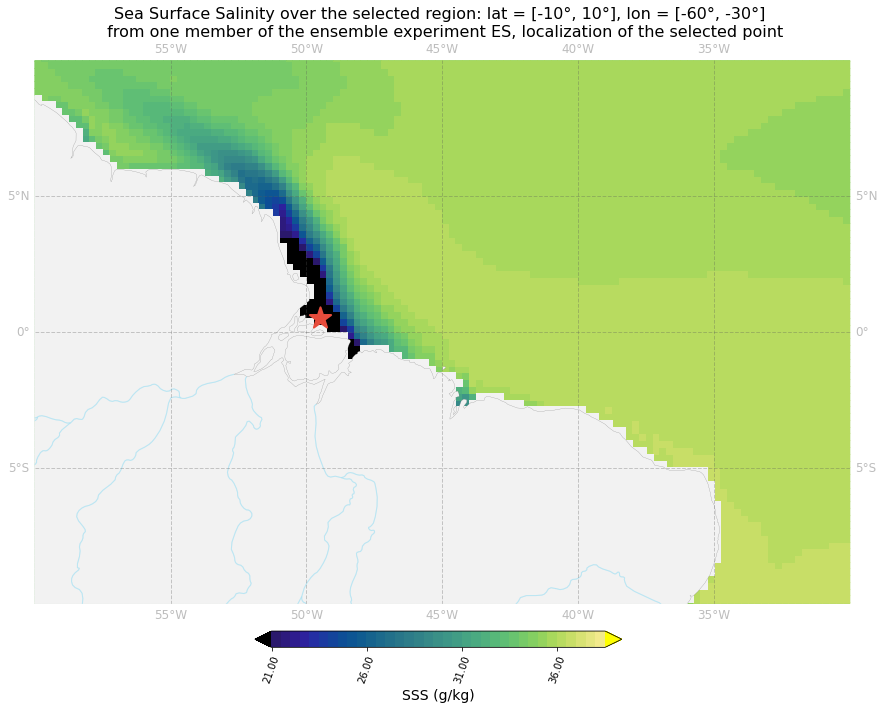

In [37]:
#========= CREATE FIGURE
fig4 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))
        

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)



#specifiy the lat and lon values
plt.text(0.6, 5.3,s="Lat = "+str(latval)+"°, Lon = "+str(lonval)+"°",ha="left",va="center",fontsize=17,bbox=dict(boxstyle="square",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)



#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD MARKERS
#initialize some default parameters
pltmarkersparam = li.Fsetmarkersparamdefaults(x=lonval,y=latval,marker='*',mulmag=500)

print(pltmarkersparam)

#plot of markers
mk = li.Faddmarkers(trdata, pltmarkersparam)

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)
        
#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig4,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='SSS (g/kg)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))          

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Sea Surface Salinity over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°] \n from one member of the ensemble experiment '+nexp+', localization of the selected point',fontsize=16)



  

        
plt.show()

### **2. Compute data, its ensemble mean and ensemble std at this point**

In [55]:
# x and y parameters: we select a point 
Dot = data.isel(x=i,y=j).compute()

In [56]:
# compute ensemble mean and ensemble std over the 10 members 
em = Dot.mean(dim='e').compute()
estd = Dot.std(dim='e').compute()

In [57]:
# compute the spread of the ensemble mean: Confidence interval 95% as we add or subsract 2*estd to em
estdMAX = em+2*estd
estdMIN = em-2*estd

In [67]:
Dot

<xarray.DataArray 'sosaline' (e: 10, time_counter: 39)>
array([[15.32812  , 14.450768 , 13.928442 , 14.223161 , 13.259035 ,
        13.313789 , 13.504732 , 13.736904 , 14.281167 , 13.766903 ,
        14.469106 , 14.147756 , 14.472822 , 13.833318 , 13.669766 ,
        13.466098 , 15.347575 , 13.751777 , 13.486775 , 13.553807 ,
        14.4069   , 13.29623  , 13.142887 , 12.349869 , 14.1608   ,
        14.138204 , 13.896749 , 13.217471 , 14.671212 , 12.913668 ,
        13.183089 , 14.262481 , 13.495798 , 12.690013 , 12.617015 ,
        12.709793 , 12.658182 , 13.197501 , 13.18189  ],
       [15.038842 , 14.464165 , 13.959412 , 14.346003 , 13.423524 ,
        13.299005 , 13.556015 , 13.707276 , 14.134165 , 13.643381 ,
        14.607421 , 14.156748 , 14.671349 , 14.071122 , 13.615395 ,
        13.274057 , 15.133265 , 14.059468 , 13.863001 , 13.650823 ,
        14.379825 , 13.338476 , 13.237784 , 12.474814 , 14.030159 ,
        14.071356 , 14.072792 , 13.280886 , 14.593511 , 12.871351 ,
        13.332446 , 14.075766 , 13.6938925, 12.752505 , 12.628929 ,
        12.648149 , 12.872937 , 13.4282875, 13.115817 ],
       [15.217528 , 14.490101 , 13.877308 , 14.18119  , 13.353682 ,
        13.33756  , 13.459624 , 13.91842  , 14.349288 , 14.02199  ,
        14.580883 , 14.124241 , 14.689078 , 13.819377 , 13.541905 ,
        13.431613 , 15.276268 , 13.899372 , 13.705857 , 13.630254 ,
...
        14.422106 , 13.373111 , 13.247679 , 12.742585 , 14.0548315,
        14.203262 , 13.973769 , 13.296597 , 14.516237 , 12.984586 ,
        13.319656 , 14.09816  , 13.686874 , 12.573529 , 12.665001 ,
        12.728686 , 13.037134 , 13.313338 , 13.149935 ],
       [15.275237 , 14.468579 , 13.826685 , 14.420906 , 13.312881 ,
        13.315241 , 13.682259 , 13.625787 , 14.216502 , 14.03324  ,
        14.565108 , 14.230762 , 14.768485 , 13.936717 , 13.660398 ,
        13.545541 , 15.316568 , 13.836178 , 13.713788 , 13.649345 ,
        14.380325 , 13.018138 , 13.064137 , 12.267457 , 14.137251 ,
        13.917366 , 13.673203 , 13.207933 , 14.666335 , 13.108043 ,
        13.278771 , 14.070594 , 13.429834 , 12.687807 , 12.625999 ,
        12.594651 , 12.899759 , 13.337984 , 13.25373  ],
       [15.1925335, 14.427057 , 13.9260645, 14.170391 , 13.167143 ,
        13.0172825, 13.429748 , 13.723778 , 14.364383 , 13.804811 ,
        14.478934 , 14.1528425, 14.689837 , 14.0421915, 13.844269 ,
        13.42538  , 15.290935 , 14.055268 , 13.795612 , 13.639062 ,
        14.432637 , 13.216232 , 13.146502 , 12.366861 , 13.913769 ,
        14.086254 , 13.796363 , 13.230604 , 14.677324 , 12.936323 ,
        13.213544 , 14.154438 , 13.54978  , 12.569591 , 12.679912 ,
        12.928592 , 12.727217 , 13.367637 , 13.091166 ]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: e
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           365

### **3. Plot timeseries of SSS for each member of the experiment at the selective point**

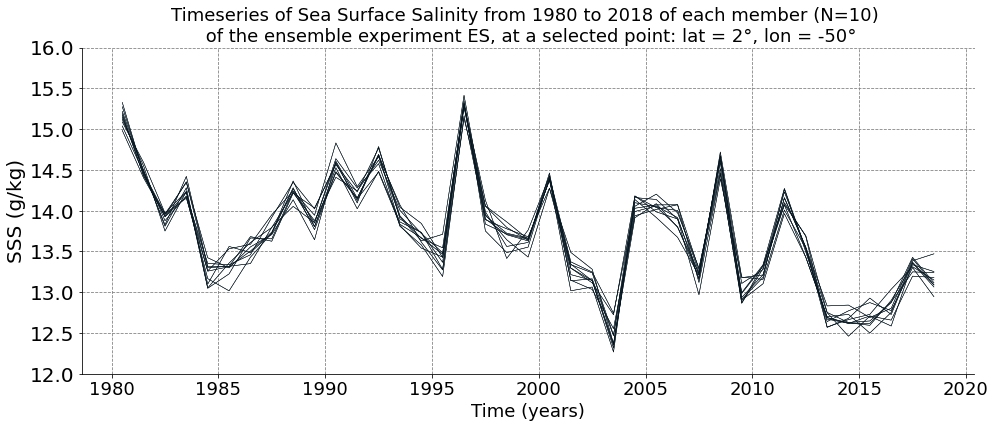

In [27]:
# name of the saved file in case you want to save it 
namo="DOTMEAN_Nao"+"_"+nexp
gp = 0
NGP=5

#-------------
# start plot by creating an empty figure
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

#-------------
# plot 
# color 1 (pick your own html code from https://htmlcolorcodes.com/)
c1="#154360"

# defined label top appear on plot
la=nexp


#plot timeseries of SSS of each member
for i in range(len(Dot)):
    Dot.isel(e=i).squeeze().plot(linewidth=0.5,color=c1,label=la)
    Dot.isel(e=i).squeeze().plot(linewidth=0.5,color='k')
    
# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear. 
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("SSS (g/kg)")

# add legend and choose where it will appear
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='Exp:', loc='lower left')

# set the limits of the plot on y axis
plt.ylim(12,16)

# plot title
plt.title('Timeseries of Sea Surface Salinity from 1980 to 2018 of each member (N='+str(NE)+') \n of the ensemble experiment '+nexp+', at a selected point: lat = '+str(latval)+'°, lon = '+str(lonval)+'°',fontsize=18, loc='center')

#specifiy the lat and lon values
#plt.text(0.6, 5.3,s="Lat = "+str(latval)+"°, Lon = "+str(lonval)+"°",ha="left",va="center",fontsize=17,bbox=dict(boxstyle="square",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

# display plot in notebook window
plt.show()

#--------------------
# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)


### **4. Plot timeseries of SSS ensemble mean and spread of the experiment at the selective point**

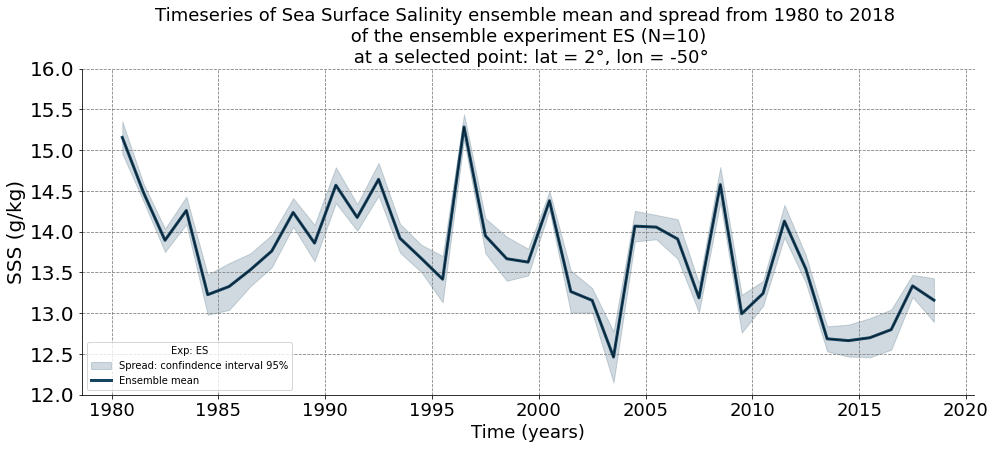

In [30]:
# name of the saved file in case you want to save it 
namo="DOTMEAN_Nao"+"_"+nexp
gp = 0
NGP=5

#-------------
# start plot by creating an empty figure
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

#-------------
# plot 
# color 1 (pick your own html code from https://htmlcolorcodes.com/)
c1="#154360"

# defined label top appear on plot
la=nexp

# plot shading between lines for ensemble mean - 2x ensemble std and ensemble mean + 2x ensemble std
plt.fill_between(em.time_counter,estdMIN,estdMAX,color=c1,alpha=0.2, label='Spread: confindence interval 95%' )

# plot ensemble mean
Dot.mean(dim='e').squeeze().plot(linewidth=3,color=c1,label='Ensemble mean')
Dot.mean(dim='e').squeeze().plot(linewidth=0.5,color='k')

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear. 
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("SSS (g/kg)")

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower left')

# set the limits of the plot on y axis
plt.ylim(12,16)

# empty plot title
plt.title('Timeseries of Sea Surface Salinity ensemble mean and spread from 1980 to 2018 \n of the ensemble experiment '+nexp+' (N='+str(NE)+') \n at a selected point: lat = '+str(latval)+'°, lon = '+str(lonval)+'°',fontsize=18)

# display plot in notebook window
plt.show()

#--------------------
# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)


### **5. Plot timeseries of SSS for each member, ensemble mean and spread of the experiment at the selective point**

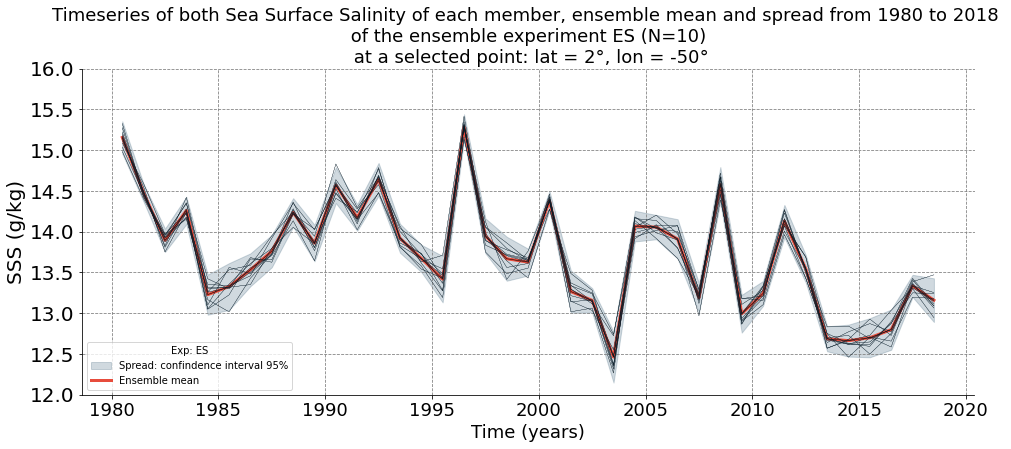

In [59]:
# name of the saved file in case you want to save it 
namo="DOTMEAN_Nao"+"_"+nexp
gp = 0
NGP=5

#-------------
# start plot by creating an empty figure
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

#-------------
# plot 
# color 1 (pick your own html code from https://htmlcolorcodes.com/)
c1="#154360"
c2= "#e74c3c"

# defined label top appear on plot
la=nexp

# plot shading between lines for ensemble mean - 2x ensemble std and ensemble mean + 2x ensemble std
plt.fill_between(em.time_counter,estdMIN,estdMAX,color=c1,alpha=0.2, label='Spread: confindence interval 95%' )

# plot ensemble mean
Dot.mean(dim='e').squeeze().plot(linewidth=3,color=c2,label='Ensemble mean')
Dot.mean(dim='e').squeeze().plot(linewidth=0.5,color='k')

#plot timeseries of SSS of each member
for i in range(len(Dot)):
    Dot.isel(e=i).squeeze().plot(linewidth=0.25,color=c1,label='')
    Dot.isel(e=i).squeeze().plot(linewidth=0.25,color='k')
    
# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear. 
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("SSS (g/kg)")

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower left')

# set the limits of the plot on y axis
plt.ylim(12,16)

# empty plot title
plt.title('Timeseries of both Sea Surface Salinity of each member, ensemble mean and spread from 1980 to 2018 \n of the ensemble experiment '+nexp+' (N='+str(NE)+') \n at a selected point: lat = '+str(latval)+'°, lon = '+str(lonval)+'°',fontsize=18)

# display plot in notebook window
plt.show()

#--------------------
# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)


### **6. Comparison of ensemble mean and std of SSS timeseries from ES and EGAI members**

* Here we load the data from EGAI exp at the same selected point as ES

In [36]:
# ES: this is experiment ES (ensemble simulation) of which we will load all the 10 members
nexp2 = "EGAI"

prefix = "eORCA025.L75-IMHOTEP"



# frequency of the input files
fo="1y"

# name of the variable
varnasss = 'sosaline'

# file type
fileType = "gridTsurf"

# period over which to read
y1='1980'
y2='2018'

# ensemble size
NE=10

# input directory on work for grid info
#diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'

# plot directory !!!! CREATE THIS DIRECTORY FIRST ON JEAN ZAY IF DOESNT EXIST YET
diro="/gpfswork/rech/cli/regi915/PLT/2023-05/"+fo+"/"

# data output directory   !!!! CREATE THIS DIRECTORY FIRST ON JEAN ZAY IF DOESNT EXIST YET
dirdat="/gpfswork/rech/cli/regi915/DAT/"



In [39]:
#load global data
data2 = li.Floadmultimb(NE,nexp2,prefix,varnasss,fo,fileType,y1,y2,xselect=[0,1442],yselect=[0,1207],verbose=False)

# Here we select only one member at a selected time (year)
data2plot2 = data2.isel(e=0,time_counter=20).compute()

data2plot2

<xarray.DataArray 'sosaline' (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time_counter  datetime64[ns] 2000-07-02
Dimensions without coordinates: y, x
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

In [78]:
# x and y parameters: we select a point (the same as for ES exp)
Dot2 = data2.isel(x=i,y=j).compute()

In [80]:
# compute ensemble mean and ensemble std over the 10 members 
em2 = Dot2.mean(dim='e').compute()
estd2 = Dot2.std(dim='e').compute()

In [81]:
# compute the spread of the ensemble mean: Confidence interval 95% as we add or subsract 2*estd to em
estdMAX2 = em2+2*estd2
estdMIN2 = em2-2*estd2

In [79]:
Dot2

<xarray.DataArray 'sosaline' (e: 10, time_counter: 39)>
array([[17.178778 , 15.748319 , 13.0540905, 17.359825 , 13.112183 ,
        12.959281 , 12.325789 , 14.131079 , 13.776678 , 12.111514 ,
        13.980492 , 13.69745  , 17.622902 , 13.630136 , 12.138213 ,
        13.931671 , 15.164278 , 14.834873 , 17.48272  , 13.6531   ,
        12.966525 , 12.66923  , 12.51926  , 12.466177 , 13.768452 ,
        15.05983  , 12.817561 , 13.051618 , 13.020517 , 11.090141 ,
        14.239496 , 13.937552 , 12.987503 , 12.405028 , 11.415067 ,
        12.415139 , 16.172365 , 14.1447315, 13.241678 ],
       [17.030016 , 15.7399435, 13.067771 , 17.443207 , 12.94142  ,
        12.904637 , 12.197187 , 14.360149 , 13.928128 , 12.360035 ,
        13.884914 , 13.605501 , 17.450384 , 13.660325 , 12.273665 ,
        14.240429 , 15.230906 , 14.864654 , 17.287483 , 13.648188 ,
        13.060884 , 12.657259 , 12.531093 , 12.532839 , 13.740248 ,
        15.026954 , 12.835949 , 13.135047 , 13.208765 , 10.989053 ,
        14.046119 , 14.012483 , 13.193744 , 12.556274 , 11.572138 ,
        12.37034  , 16.254915 , 14.258026 , 13.12498  ],
       [17.204409 , 15.908675 , 13.045373 , 17.284605 , 13.197454 ,
        12.978797 , 12.104558 , 14.453591 , 14.054132 , 12.265284 ,
        13.862586 , 13.807171 , 17.523762 , 13.6072035, 12.162064 ,
        14.038816 , 15.299015 , 14.713374 , 17.445307 , 13.673087 ,
...
        13.2019615, 12.748934 , 12.535046 , 12.450831 , 13.747059 ,
        15.06834  , 12.630514 , 13.171992 , 13.07817  , 11.285524 ,
        14.023846 , 13.878552 , 13.159259 , 12.419489 , 11.628603 ,
        12.316033 , 16.236198 , 14.390851 , 13.195014 ],
       [17.21529  , 15.795591 , 13.139734 , 17.28275  , 12.919135 ,
        13.276449 , 12.350829 , 14.365279 , 14.017847 , 12.475264 ,
        13.838653 , 13.859101 , 17.509275 , 13.530691 , 12.169149 ,
        14.037807 , 15.383767 , 15.099191 , 17.288847 , 13.7121105,
        12.978677 , 12.906724 , 12.586944 , 12.3287115, 13.682066 ,
        15.106245 , 12.54605  , 13.2674055, 12.94007  , 11.212866 ,
        14.049589 , 13.92412  , 13.228084 , 12.263873 , 11.647862 ,
        12.309865 , 15.889134 , 14.147242 , 13.147983 ],
       [17.327213 , 15.7286005, 12.952747 , 17.096304 , 13.163718 ,
        13.078653 , 12.350435 , 14.271851 , 14.067619 , 12.062998 ,
        13.885663 , 13.664557 , 17.598318 , 13.673648 , 12.159684 ,
        14.102433 , 15.42796  , 14.897522 , 17.521519 , 13.752609 ,
        13.210818 , 12.670513 , 12.642492 , 12.315819 , 13.845101 ,
        15.2750635, 12.725062 , 13.1071005, 13.102512 , 11.182015 ,
        14.080409 , 13.908067 , 13.199431 , 12.351482 , 11.615574 ,
        12.468132 , 16.297203 , 14.259117 , 13.026554 ]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: e
Attributes:
    units:             1e-3
    valid_min:         0.0
    valid_max:         0.0
    long_name:         sea surface salinity
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

* Plot of both ensemble mean and spread of ES and EGAI members

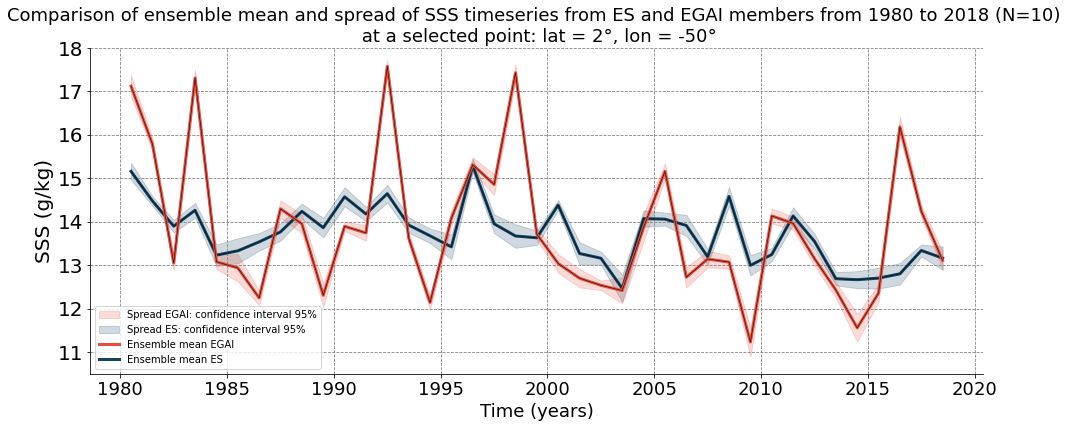

In [86]:
# name of the saved file in case you want to save it 
namo="DOTMEAN_Nao"+"_"+nexp
gp = 0
NGP=5

#-------------
# start plot by creating an empty figure
fig1 = plt.figure(figsize=([16,6]),facecolor='white')  

#-------------
# plot 
# color 1 (pick your own html code from https://htmlcolorcodes.com/)
c1="#154360"
c2= "#e74c3c"


# plot shading between lines for ensemble mean of ES members - 2x ensemble std and ensemble mean + 2x ensemble std
plt.fill_between(em.time_counter,estdMIN,estdMAX,color=c1,alpha=0.2, label='Spread ES: confidence interval 95%' )

# plot shading between lines for ensemble mean of EGAI members - 2x ensemble std and ensemble mean + 2x ensemble std
plt.fill_between(em2.time_counter,estdMIN2,estdMAX2,color=c2,alpha=0.2, label='Spread EGAI: confidence interval 95%' )

# plot ensemble mean of ES members
Dot.mean(dim='e').squeeze().plot(linewidth=3,color=c1,label='Ensemble mean ES')
Dot.mean(dim='e').squeeze().plot(linewidth=0.5,color='k')

# plot ensemble mean of EGAI
Dot2.mean(dim='e').squeeze().plot(linewidth=3,color=c2,label='Ensemble mean EGAI')
Dot2.mean(dim='e').squeeze().plot(linewidth=0.5,color='k')

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear. 
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("SSS (g/kg)")

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='lower left')

# set the limits of the plot on y axis
plt.ylim(10.5,18)

# empty plot title
plt.title('Comparison of ensemble mean and spread of SSS timeseries from ES and EGAI members from 1980 to 2018 (N='+str(NE)+') \n at a selected point: lat = '+str(latval)+'°, lon = '+str(lonval)+'°',fontsize=18)

# display plot in notebook window
plt.show()

#--------------------
# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)


### **7. Check the sum of the variances at a selected point**

Compute of:
* The time-mean of the ensemble variance (INTRINSIC VARIABILITY)
* The time-variance of the ensemble mean (FORCED VARIABILITY)
* The ensemble mean of each individual member time-variance (TOTAL VARIABILITY)

Then we check that the sum of the 2 first terms equals the third one.

#### Intrinsic variability

In [38]:
#Time-mean of the ensemble variance (intrinsic variability)
ev = Dot.var(dim='e')
ev_tm = ev.mean(dim='time_counter')
ev_tm

<xarray.DataArray 'sosaline' ()>
array(0.01052328, dtype=float32)

#### Forced variability

In [39]:
#Time-variance of the ensemble mean (forced variability)
em = Dot.mean(dim='e')
em_tv = em.var(dim='time_counter')
em_tv

<xarray.DataArray 'sosaline' ()>
array(0.44650656, dtype=float32)

#### Total variability

In [40]:
#Ensemble mean of each individual member time-variance (total variability)

for i in range(len(Dot)):
    tv = Dot.var(dim='time_counter')
    
tv_em = tv.mean(dim='e')
tv_em

<xarray.DataArray 'sosaline' ()>
array(0.45682877, dtype=float32)

#### Sum of the forced and intrinsic variability compared to the total variability

In [41]:
print(em_tv + ev_tm)
tv_em

<xarray.DataArray 'sosaline' ()>
array(0.45702985, dtype=float32)


<xarray.DataArray 'sosaline' ()>
array(0.45682877, dtype=float32)

- Total variability = 0.45682877
- Intrinsic variability + Forced variability = 0.45702985

There is a residual since we only have 10 members, so this shows that some of the assumptions made to demonstrate equality are not entirely true.
